In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/priya/Downloads/train.csv')

In [3]:

print(df['TARGET_5Yrs'].value_counts())

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64


In [4]:
print(df.head())
df.tail()

   Id_old    Id  GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA  ...  FTA   FT%  \
0   10556  3799  80  24.3   7.8  3.0  6.4  45.7      0.1  0.3  ...  2.9  72.1   
1    5342  3800  75  21.8  10.5  4.2  7.9  55.1     -0.3 -1.0  ...  3.6  67.8   
2    5716  3801  85  19.1   4.5  1.9  4.5  42.8      0.4  1.2  ...  0.6  75.7   
3   13790  3802  63  19.1   8.2  3.5  6.7  52.5      0.3  0.8  ...  1.5  66.9   
4    5470  3803  63  17.8   3.7  1.7  3.4  50.8      0.5  1.4  ...  0.5  54.0   

   OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0   2.2   2.0  3.8  3.2  1.1  0.2  1.6            1  
1   3.6   3.7  6.6  0.7  0.5  0.6  1.4            1  
2   0.6   1.8  2.4  0.8  0.4  0.2  0.6            1  
3   0.8   2.0  3.0  1.8  0.4  0.1  1.9            1  
4   2.4   2.7  4.9  0.4  0.4  0.6  0.7            1  

[5 rows x 22 columns]


,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
7995,2996,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1
7999,2900,11798,49,19.2,4.8,1.7,5.1,32.6,0.7,2.4,...,1.3,70.1,0.1,1.1,1.2,3.5,0.9,-0.3,1.4,1


In [5]:
target = df.pop('TARGET_5Yrs')

In [6]:
df.drop('Id_old', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

In [7]:
df.columns = df.columns.str.strip()
df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
1,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4
7996,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3
7997,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8
7998,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       8000 non-null   int64  
 1   MIN      8000 non-null   float64
 2   PTS      8000 non-null   float64
 3   FGM      8000 non-null   float64
 4   FGA      8000 non-null   float64
 5   FG%      8000 non-null   float64
 6   3P Made  8000 non-null   float64
 7   3PA      8000 non-null   float64
 8   3P%      8000 non-null   float64
 9   FTM      8000 non-null   float64
 10  FTA      8000 non-null   float64
 11  FT%      8000 non-null   float64
 12  OREB     8000 non-null   float64
 13  DREB     8000 non-null   float64
 14  REB      8000 non-null   float64
 15  AST      8000 non-null   float64
 16  STL      8000 non-null   float64
 17  BLK      8000 non-null   float64
 18  TOV      8000 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 1.2 MB


In [9]:
print(df.describe())

                GP          MIN          PTS          FGM          FGA  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     62.777875    18.576663     7.267087     2.807037     6.231213   
std      17.118774     8.935263     4.318732     1.693373     3.584559   
min      -8.000000     2.900000     0.800000     0.300000     0.800000   
25%      51.000000    12.000000     4.100000     1.600000     3.600000   
50%      63.000000    16.800000     6.300000     2.400000     5.400000   
75%      74.000000    23.500000     9.500000     3.700000     8.100000   
max     123.000000    73.800000    34.200000    13.100000    28.900000   

               FG%      3P Made          3PA          3P%          FTM  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     44.608900     0.264525     0.816563    19.583700     1.392525   
std       6.155453     0.384093     1.060964    16.003155     0.926153   
min      21.300000    -1.100000    -3

In [10]:
df.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

In [11]:
duplicate = df.duplicated()
print(duplicate.sum())

0


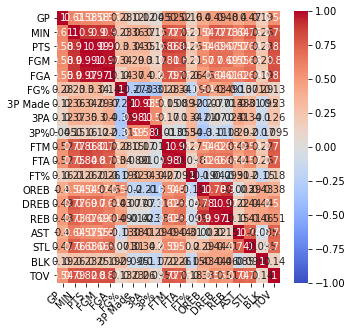

In [12]:
corr = df.corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [13]:
df_cleaned = df.drop(['FG%', '3P%', 'FT%'], axis = 1) 

In [14]:
df_cleaned

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV
0,80,24.3,7.8,3.0,6.4,0.1,0.3,2.0,2.9,2.2,2.0,3.8,3.2,1.1,0.2,1.6
1,75,21.8,10.5,4.2,7.9,-0.3,-1.0,2.4,3.6,3.6,3.7,6.6,0.7,0.5,0.6,1.4
2,85,19.1,4.5,1.9,4.5,0.4,1.2,0.4,0.6,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3,63,19.1,8.2,3.5,6.7,0.3,0.8,0.9,1.5,0.8,2.0,3.0,1.8,0.4,0.1,1.9
4,63,17.8,3.7,1.7,3.4,0.5,1.4,0.2,0.5,2.4,2.7,4.9,0.4,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,-0.1,-0.2,0.4,0.6,0.3,1.8,1.9,0.5,0.3,0.2,0.4
7996,54,6.0,1.8,0.7,1.4,0.1,0.1,0.2,0.4,1.0,1.1,2.0,0.1,0.0,0.3,0.3
7997,85,28.2,10.7,4.0,9.0,0.2,0.6,2.8,3.9,1.0,2.1,3.1,3.4,1.2,0.2,1.8
7998,39,7.7,2.5,1.0,2.3,-0.3,-0.5,0.6,0.7,0.4,0.6,0.9,0.2,0.3,0.3,0.5


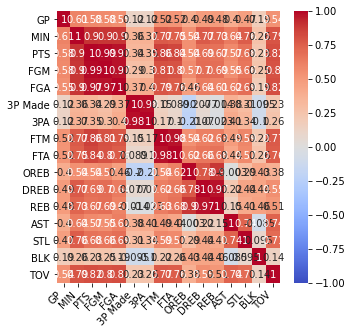

In [15]:
corr = df_cleaned.corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
scaler = StandardScaler()

In [17]:
df_cleaned = scaler.fit_transform(df_cleaned)

In [18]:
from imblearn.over_sampling import SMOTE 

In [19]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(df_cleaned, target)

print(f'''Shape of X before SMOTE: {df_cleaned.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (8000, 16)
Shape of X after SMOTE: (13338, 16)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: TARGET_5Yrs, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=8)

In [21]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.score(X_test, y_test)

0.6649175412293853

In [24]:
model.predict_proba(X_test)

array([[0.53312375, 0.46687625],
       [0.56462931, 0.43537069],
       [0.18183769, 0.81816231],
       ...,
       [0.70943612, 0.29056388],
       [0.57597191, 0.42402809],
       [0.64717444, 0.35282556]])

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[896 410]
 [484 878]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1306
           1       0.68      0.64      0.66      1362

    accuracy                           0.66      2668
   macro avg       0.67      0.67      0.66      2668
weighted avg       0.67      0.66      0.66      2668



In [27]:
roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
roc

0.7270740713256112

In [39]:
df1 = pd.read_csv('/Users/priya/Downloads/test.csv')
df1.drop('Id', axis=1, inplace=True)
df1.drop('Id_old', axis=1, inplace=True)

In [40]:
df2 = df1.drop(['FG%', '3P%', 'FT%'], axis = 1) 

In [41]:

df2

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV
0,56,9.1,4.0,1.6,3.7,0.1,0.3,0.7,1.2,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43,19.3,10.1,3.7,8.1,0.6,1.7,1.8,2.5,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,82,33.9,11.3,4.9,10.6,0.5,1.9,1.8,2.7,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86,44.7,18.8,6.8,15.9,0.5,1.8,4.5,6.3,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58,12.3,4.7,1.6,4.0,0.5,1.7,1.1,1.3,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84,21.2,8.7,3.4,6.7,0.0,0.0,1.7,2.5,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,49,16.3,6.4,2.9,6.6,-0.1,-0.4,1.0,1.9,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,53,9.9,2.1,0.8,1.8,-0.4,-0.6,0.6,1.0,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,89,38.3,14.5,5.4,11.8,0.5,1.2,2.5,2.9,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [42]:
df1_cleaned = scaler.fit_transform(df2)

In [43]:
df1_cleaned

array([[-0.3996569 , -1.09444225, -0.77501409, ..., -1.10492692,
         0.06609733, -0.64281172],
       [-1.15769727,  0.07446345,  0.64552019, ..., -0.13054963,
        -0.40296321,  0.76098325],
       [ 1.11642385,  1.74760297,  0.92496956, ...,  1.57461062,
         0.06609733,  1.04174224],
       ...,
       [-0.57458929, -1.00276337, -1.21747559, ..., -0.61773827,
        -0.09025619, -1.06395021],
       [ 1.52459944,  2.2518368 ,  1.67016787, ...,  1.57461062,
         0.06609733,  1.60326023],
       [-0.4579677 , -0.76210631, -1.00788856, ..., -0.86133259,
        -0.09025619, -0.08129373]])

In [44]:
final = model.predict_proba(df1_cleaned)[:,1]

In [45]:
df1_cleaned

array([[-0.3996569 , -1.09444225, -0.77501409, ..., -1.10492692,
         0.06609733, -0.64281172],
       [-1.15769727,  0.07446345,  0.64552019, ..., -0.13054963,
        -0.40296321,  0.76098325],
       [ 1.11642385,  1.74760297,  0.92496956, ...,  1.57461062,
         0.06609733,  1.04174224],
       ...,
       [-0.57458929, -1.00276337, -1.21747559, ..., -0.61773827,
        -0.09025619, -1.06395021],
       [ 1.52459944,  2.2518368 ,  1.67016787, ...,  1.57461062,
         0.06609733,  1.60326023],
       [-0.4579677 , -0.76210631, -1.00788856, ..., -0.86133259,
        -0.09025619, -0.08129373]])

In [47]:
pd.DataFrame(final).to_csv("/Users/priya/Downloads/eliminated_var.csv")